### `Introduction`

Video games have come a long way since the creation of Pong in 1972. Over the course of 50 years, video games have grown into a \\$184.4 billion dollar industry (Arora, 2023). It has far outgrown both the music and movie industry (\\$26.2 billion and \\$26 billion respectively). Such a lucrative market attracts a great amount of aspiring game developers, but many have trouble deciding whether to join an established company or try their luck with a small independant studio. \
\
This data story serves to decrease the difficulty of this question. To this end, we are going to explore the difference between triple A games, meaning ‘developed by a large company’, and Indie games, meaning 'developed by small team'. This is done by comparing their price, sales numbers, player counts and review scores. \
First, we will describe our dataset and the preprocessing steps to tailor it. Next, we will go over the advantages of triple A games with respect to the aforementioned criteria. Afterwards, we will do the same with Indie games to reach a conclusion about which development and publishing style is superior.


In [4]:
{
    "tags": [
        "hide_input",
    ]
}

# Import packages
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
from plotly.subplots import make_subplots


### `Dataset & preprocessing`

We have chosen a variety of datasets to include a lot of variables. We mainly use `steam_reviews_revenue.csv` which is a modified version of the steam dataset (Davis, 2019). Steam is the most used game launcher for PC's and desktops. We modified this dataset with a few extra variables such as is_aaa, Estimated Revenue and review_ratio. We've created a list containing the biggest videogame publishers: if a game's publishers is in this list, that entry's is_aaa is set to 1. Otherwise its value is 0. Estimated Revenue, along with the Launch Price variable, was taken from the Steam Trends 2023 dataset (Barabanov & Kobelev, 2023). They were merged with the steam dataset on the game's name. For review_ratio, we first calculated the total number of reviews for a game (positive_ratings + negative_ratings). The amount of positive reviews is then devided by total reviews. \
Other datasets used: \
`player_count.csv` (Ali, 2023): contains various playercount stats: "current" indicates the amount of players a game has right now, "24th peak" the amount of players a game had on it's 24th peak and "all time peak" the highest amount of players a game has ever had. \
`result.csv` (Paredes, 2018): contains metascores (0-100) of various games. These come from Metacritic, which is a highly trusted game review website. \
`vgsales.csv` (Smith, 2016): contains the revenue of a large selection of console games that sold over 100000 copies. \
`Valve_Player_Data.csv` (Ogozaly, 2021): this dataset contains average monthly player counts for a select few games from 2012 through 2021. \
These datasets were all merged with the steam dataset (Davis, 2019) on name.

### `Triple A games`

Triple A games are video games developed and published by large companies. Some of these games can have hundreds of talented designers, artists and programmers working on them. Thus, it is no surprise when the general public expects a lot from these games. In this next section, we shall determine whether these expectations are met. 

### Estimated revenue

The most straightforward statistic to look at for benchmarking a game's reception is its achieved revenue. Sadly, actual revenue numbers are almost exclusively hidden from the public or locked behind a paywall. This is why we used the estimated revenue from the steam trends dataset (Evlko & Sadari, 2023). For this estimate Barabanov and Kobelev used the 'NB number', which describes a game's sale counts per review left on that game (Carless, 2020). Review counts are a public statistic that can be found on Steam. These reviews are openly displayed on a game's store page. \
We also wanted to see if a game's estimated revenue would be higher if that game was well received. For this, we calculated the percentage of positive reviews left on a game's Steam page (positive review count divided by total review count).

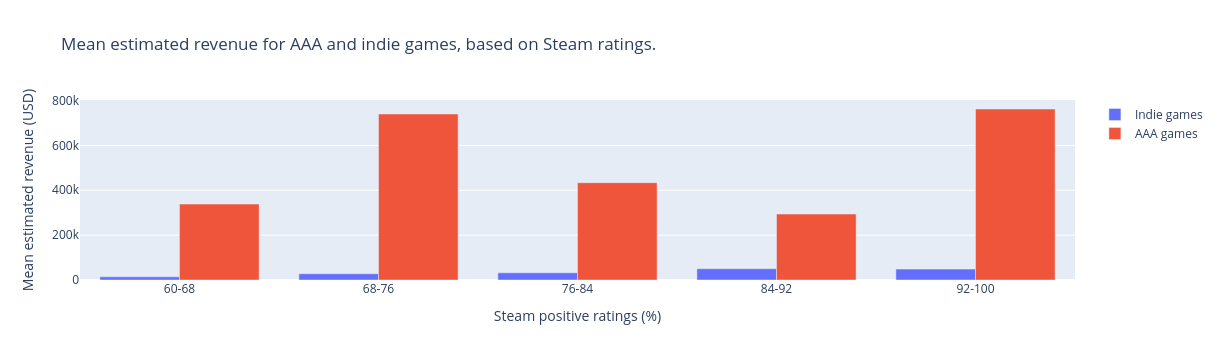

In [5]:
df_rev = pd.read_csv('DATASETS/steam_reviews_revenue.csv')
indie = df_rev[df_rev['is_aaa'] == 0]
indie = indie[indie['review_ratio'] >= 60]
indie = indie[indie['Launch Price'] <= 60]
indie = indie[indie['Revenue Estimated'] <= 12000000]
indie['x_as'] = pd.cut(indie['review_ratio'], 5, labels=('1','2','3','4','5'))
indie = indie[['x_as', 'Revenue Estimated']]
indie['x_as2'] = indie['x_as']
indie['x_as'] = indie['x_as'].astype(float)
indie = indie.groupby(['x_as2'], observed=False).mean()
indie['x_as'] = indie['x_as'].astype(str)
indie['x_as'] = indie['x_as'].replace(['1.0','2.0','3.0','4.0','5.0'],['60-68','68-76','76-84','84-92','92-100'])

aaa = df_rev[df_rev['is_aaa'] == 1]
aaa = aaa[aaa['review_ratio'] >= 60]
aaa = aaa[aaa['Launch Price'] <= 120]
aaa = aaa[aaa['Revenue Estimated'] <= 30000000]
aaa['x_as'] = pd.cut(aaa['review_ratio'], 5, labels=('1','2','3','4','5'))
aaa = aaa[['x_as', 'Revenue Estimated']]
aaa['x_as2'] = aaa['x_as']
aaa['x_as'] = aaa['x_as'].astype(float)
aaa = aaa.groupby(['x_as2'], observed= False).mean()
aaa['x_as'] = aaa['x_as'].astype(str)
aaa['x_as'] = aaa['x_as'].replace(['1.0','2.0','3.0','4.0','5.0'],['60-68','68-76','76-84','84-92','92-100'])

trace =[
    go.Bar(name='Indie games', x = indie['x_as'], y = indie['Revenue Estimated']),
    go.Bar(name='AAA games', x = aaa['x_as'], y = aaa['Revenue Estimated'])
]
layout = go.Layout(
    xaxis=go.layout.XAxis(
        type='category'
    )
)
fig = go.Figure(data=trace, layout=layout)
fig.update_layout(
    title_text='Mean estimated revenue for AAA and indie games, based on Steam ratings',
    xaxis_title='Steam positive ratings (%)',
    yaxis_title='Mean estimated revenue (USD)',
    height=400
)

fig.show()

This graph shows Triple A games achieve a higher revenue compared to Indie games, no matter how well the games are received. We can conclude that Triple A games provide a much more consistent stream of income. \
The graph also shows that an Indie game's Steam reviews have a significant impact on its estimated revenue. This is not the case for Triple A games, most likely because these large studios can rely on marketing campaigns and brand loyalty.

### Metascore

Next, we decided to look at a game's Metascore. Metascore is a score given to a video game based on reviews. The score ranges from 0 to 100 with 100 being the highest. Metascores come from Metacritic: an extremely popular game review site similar to imdb for movies. We were also interested in the impact of a game's price on its Metascore: higher prices may lead to higher expectations that are harder to meet. On the other hand, people may soften their critiques to justify their purchase.

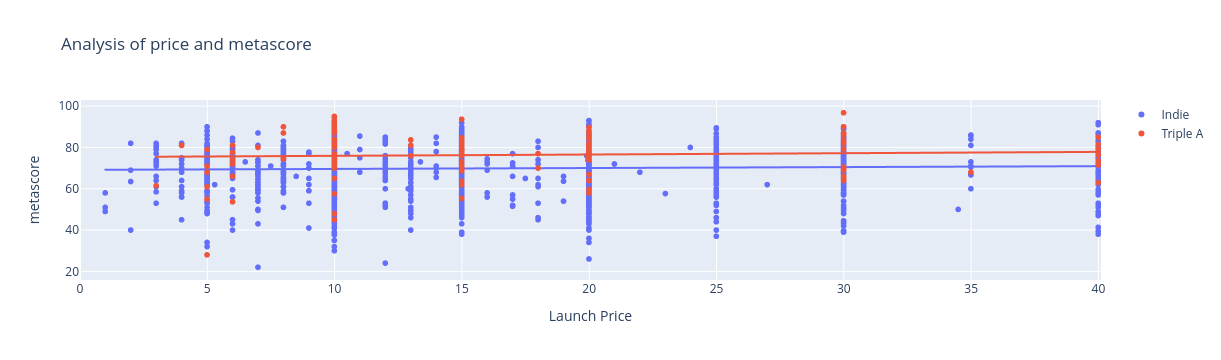

In [6]:
df1 = pd.read_csv("DATASETS/result.csv")[["metascore", "name"]]
df2 = pd.read_csv("DATASETS/steam_reviews_revenue.csv")[["name", "Launch Price", "is_aaa"]]

df = pd.merge(df1, df2, how="inner", on="name")
df = df.groupby(df["name"]).aggregate({"name":"first", "Launch Price":"mean", "metascore":"mean", "is_aaa":"first"})

df["is_aaa"] = df["is_aaa"].replace({0:"Indie", 1:"Triple A"})

fig = px.scatter(df, x='Launch Price', y='metascore', trendline='ols', title='Analysis of price and metascore', color="is_aaa", labels={'is_aaa':''})
fig.update_layout(xaxis=dict(range=[0, 40.1]))
fig.update_traces(selector=dict(type='trendline'), name='Trendline')
fig.show()

Metascore is a score given to a video game based on user reviews and critics scores. The score ranges from 0 to 100 with 100 being the highest. We set the price range from 0 to 40 since there are not a lot of data points above a price of 40. This way the regression lines will fit the model better. The lines fitting the model have a slight incline of about 0.04 (Indie) and 0.06 (Triple A). We can conclude that price is not a relevant factor for the metascore. One thing you can notice is that Triple A games are better rated overall. At a launch price of 5 dollars the difference in metascore is about 6.25, which is a significant distinction. Although price may not influence the Metascore, being a triple A game does have an impact on it.

### Player counts

We also wanted to discover the correlation between a game's price and the amount of people that play it. For this, we gathered player count numbers like all-time peak and current playerbase. Again, we were interested to see the impact of a game's price on its reception, so we have included this in the graph as well.

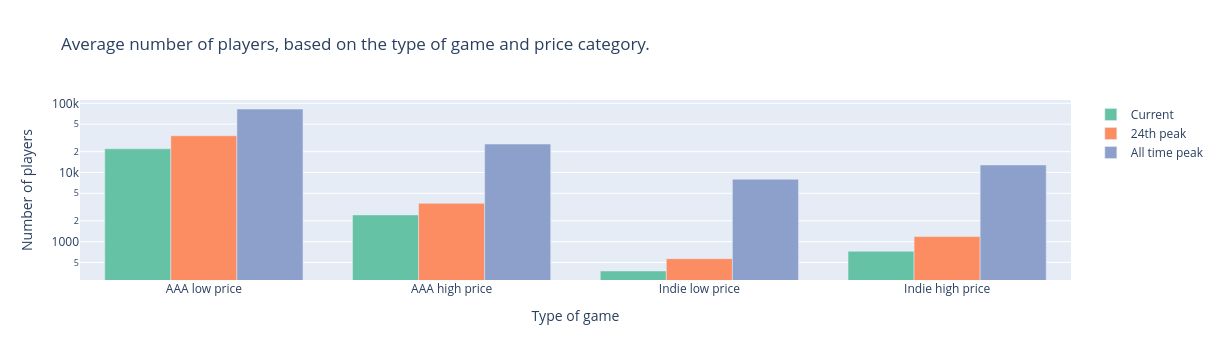

In [7]:
{
    "tags": [
        "hide_input",
    ]
}

df1 = pd.read_csv('DATASETS/aaa_published_games.csv')
df1 = df1[['name', 'price']]
df2 = pd.read_csv('DATASETS/indie_published_games.csv')
df2 = df2[['name', 'price']]
df3 = pd.read_csv('DATASETS/player_count.csv')
df1 = df1.merge(df3, how='inner', on='name')
df2 = df2.merge(df3, how='inner', on='name')
df1['Type of game']='AAA'
df2['Type of game']='Indie'
df = df1.merge(df2, how='outer')
df = df.drop(columns=['Unnamed: 5'])

AAA = df[df["Type of game"]=='AAA']
AAA.loc[:, 'Current'] = pd.to_numeric(AAA['Current'], errors='coerce')
AAA.loc[:, '24th Peak'] = pd.to_numeric(AAA['24th Peak'], errors='coerce')
AAA.loc[:, 'All_time peak'] = pd.to_numeric(AAA['All_time peak'], errors='coerce')

# AAA_price_categories = pd.qcut(AAA["price"], 3, labels=["Low", "Medium", "High"])
AAA['price_category'] = pd.qcut(AAA.loc[:, "price"], 2, labels=["Low", "High"])

AAA_low = AAA[AAA["price_category"]=="Low"]
AAA_current_low = AAA_low['Current'].mean() 
AAA_24th_low = AAA_low['24th Peak'].mean()
AAA_all_time_low = AAA_low['All_time peak'].mean()

# AAA_medium = AAA[AAA["price_category"]=="Medium"]
# AAA_current_medium = AAA_medium['Current'].mean() 
# AAA_24th_medium = AAA_medium['24th Peak'].mean()
# AAA_all_time_medium = AAA_medium['All_time peak'].mean()

AAA_high = AAA[AAA["price_category"]=="High"]
AAA_current_high = AAA_high['Current'].mean() 
AAA_24th_high = AAA_high['24th Peak'].mean()
AAA_all_time_high = AAA_high['All_time peak'].mean()

Indie = df[df["Type of game"]=='Indie']
Indie.loc[:, 'Current'] = pd.to_numeric(Indie['Current'], errors='coerce')
Indie.loc[:, '24th Peak'] = pd.to_numeric(Indie['24th Peak'], errors='coerce')
Indie.loc[:, 'All_time peak'] = pd.to_numeric(Indie['All_time peak'], errors='coerce')

# Indie_price_categories = pd.qcut(Indie["price"], 3, labels=["Low", "Medium", "High"])
Indie_price_categories = pd.qcut(Indie["price"], q=2, labels=["Low", "High"])

Indie['price_category'] = Indie_price_categories

Indie_low = Indie[Indie["price_category"]=="Low"]
Indie_current_low = Indie_low['Current'].mean() 
Indie_24th_low = Indie_low['24th Peak'].mean()
Indie_all_time_low = Indie_low['All_time peak'].mean()

# Indie_medium = Indie[Indie["price_category"]=="Medium"]
# Indie_current_medium = Indie_medium['Current'].mean() 
# Indie_24th_medium = Indie_medium['24th Peak'].mean()
# Indie_all_time_medium = Indie_medium['All_time peak'].mean()

Indie_high = Indie[Indie["price_category"]=="High"]
Indie_current_high = Indie_high['Current'].mean() 
Indie_24th_high = Indie_high['24th Peak'].mean()
Indie_all_time_high = Indie_high['All_time peak'].mean()

# data = [['AAA low price', AAA_current_low, AAA_24th_low, AAA_all_time_low], ['AAA medium price', AAA_current_medium, AAA_24th_medium, AAA_all_time_medium], ['AAA high price', AAA_current_high, AAA_24th_high, AAA_all_time_high], ['Indie low price', Indie_current_low, Indie_24th_low, Indie_all_time_low], ['Indie medium price', Indie_current_medium, Indie_24th_medium, Indie_all_time_medium], ['Indie high price', Indie_current_high, Indie_24th_high, Indie_all_time_high]]
data = [['AAA low price', AAA_current_low, AAA_24th_low, AAA_all_time_low], ['AAA high price', AAA_current_high, AAA_24th_high, AAA_all_time_high], ['Indie low price', Indie_current_low, Indie_24th_low, Indie_all_time_low], ['Indie high price', Indie_current_high, Indie_24th_high, Indie_all_time_high]]

df = pd.DataFrame(data, columns=['Type of game', 'Current', '24th peak', 'All time peak'])

trace =[
    go.Bar(name='Current ', x = df['Type of game'], y = df['Current'], marker_color='rgb(102,194,165)'),
    go.Bar(name='24th peak', x = df['Type of game'], y = df['24th peak'], marker_color='rgb(252,141,98)'),
    go.Bar(name='All time peak', x = df['Type of game'], y = df['All time peak'], marker_color='rgb(141,160,203)'),
]

layout = go.Layout(
    xaxis=go.layout.XAxis(
        type='category'
    ),
    yaxis=go.layout.YAxis(
    )
)
fig = go.Figure(data=trace, layout=layout)
fig.update_layout(
    title_text='Average number of players, based on the type of game and price category',
    xaxis_title='Type of game',
    yaxis_title='Number of players',
    height=600
)

fig.update_yaxes(type="log") # mick edit :o

fig.show()

You can draw some interesting conclusions based on this plot. You can see that Triple A games have more players overall than Indie games. Another clear difference is that the current and 24th peak is a lot higher for Triple A games. We can conclude that Triple A games have a higher playerbase than Indie games. Last thing to notice about this graph is the difference between high and low priced games. Low priced Triple A games have higher player peak than high priced Triple A games, while Indie games have the opposite. Triple A games are typically higher priced, thus this means that most players are in the medium price range.

### Loyal playerbase


Not only do Triple A games have a higher player count they also have more people coming back.

In [8]:
{
    "tags": [
        "hide_input",
    ]
}

df1 = pd.read_csv('../docs/DATASETS/result.csv')
df1['name'] = df1['name'].str.lower().replace(r'\s+','',regex=True).replace(r':','',regex=True).replace(r'-','',regex=True)

df2 = pd.read_csv('../docs/DATASETS/vgsales.csv')
df2['name'] = df2['name'].str.lower().replace(r'\s+','',regex=True).replace(r':','',regex=True).replace(r'-','',regex=True)

df3 = pd.read_csv('../docs/DATASETS/steam.csv')
df3['name'] = df3['name'].str.lower().replace(r'\s+','',regex=True).replace(r':','',regex=True).replace(r'-','',regex=True)

df4 = pd.read_csv('../docs/DATASETS/steam_reviews_revenue.csv')
df4['name'] = df4['name'].str.lower().replace(r'\s+','',regex=True).replace(r':','',regex=True).replace(r'-','',regex=True)

df1.set_index('name', inplace=True)
df2.set_index('name', inplace=True)
df3.set_index('name', inplace=True)
df4.set_index('name', inplace=True)

df2.drop(columns='publisher', inplace=True)
df4.drop(columns=['appid','english','release_date','developer','publisher','platforms','required_age',
                  'categories','genres','steamspy_tags','achievements','positive_ratings','negative_ratings',
                  'average_playtime','median_playtime','owners','Unnamed: 0.1','Unnamed: 0'], inplace=True)

temp_df = df1.join(df2, on='name', how='inner',rsuffix=' - df2')
temp_df = temp_df.join(df3, on='name', how='inner',rsuffix=' - df3')
com_df = temp_df.join(df4, on='name', how='inner', rsuffix=' - df4').reset_index()

com_df = com_df[com_df['average_playtime'] > 0]

# pos neg ratio rating
com_df['ratio_rating'] = (com_df['positive_ratings'] * 100) / (com_df['negative_ratings'] + com_df['positive_ratings'])

ratio_se = pd.qcut(com_df['ratio_rating'], q=3, retbins=True, labels=['Low','Average','High'])
com_df['ratio_bins'] = ratio_se[0]

# metascore 
# meta_se = pd.qcut(com_df['metascore'], q=5, retbins=True, labels=['very low','low','medium','high','very high']) # orginal
meta_se = pd.qcut(com_df['metascore'], q=3, retbins=True, labels=['Low','Average','High']) # test

com_df['meta_bins'] = meta_se[0]

# owners
owners_bins = {
    '0-20000':'<200k',
    '20000-50000':'<200k',
    '50000-100000':'<200k',
    '100000-200000':'<200k',
    '200000-500000':'200k-1m',
    '500000-1000000':'200k-1m',
    '1000000-2000000':'1-5m',
    '2000000-5000000':'1-5m',
    '5000000-10000000':'>5m',
    '10000000-20000000':'>5m',
    '20000000-50000000':'>5m',
    '50000000-100000000':'>5m',
    '100000000-200000000':'>5m',
}
com_df['owners_bins'] = com_df['owners'].map(owners_bins,)

# consoles 
console_bins = {
    'PC':'PC',
    'PS4':'PSN',
    'XONE':'XBOX',
    'X360':'XBOX',
    'Switch':'Nintendo',
    'PS3':'PSN',
    'WIIU':'Nintendo',
    'XBOX':'XBOX',
    'VITA':'PSN',
    'PS2':'PSN',
    'WII':'Nintendo',
    'PSP':'PSN',
    '3DS':'Nintendo',
    'DS':'Nintendo',
    'GC':'Nintendo',
    'GBA':'Nintendo',
    'PS':'PSN',
    'DC':'Nintendo',
}
com_df['console_bins'] = com_df['console'].map(console_bins)

# price
price_se = pd.cut(com_df['Launch Price'],[-1,10,20,50,500],labels=['<10$','10-20$','20-50$','>50$'],retbins=True)
com_df['price_bins'] = price_se[0]

# playtime
playt_se = pd.cut(com_df['average_playtime'],[-1,20,200,500,100000],labels=['<20h','20-200h','200-500h','>500h'],retbins=True)
com_df['playt_bins'] = playt_se[0]
com_df['average_playtime'].value_counts()

# is AAA
AAA_bins = {
    1:'Triple A',
    0:'Indie'
}
com_df['AAA_bins'] = com_df['is_aaa'].map(AAA_bins)

# colors for parcats
low = '#FF6F9F'
Average = '#6F9FFF'
high = '#9FFF6F'

meta_colors = {
    'Low':low,
    'Average':Average,
    'High':high,
}

AAA_colors = {
    0:low,
    1:Average
}

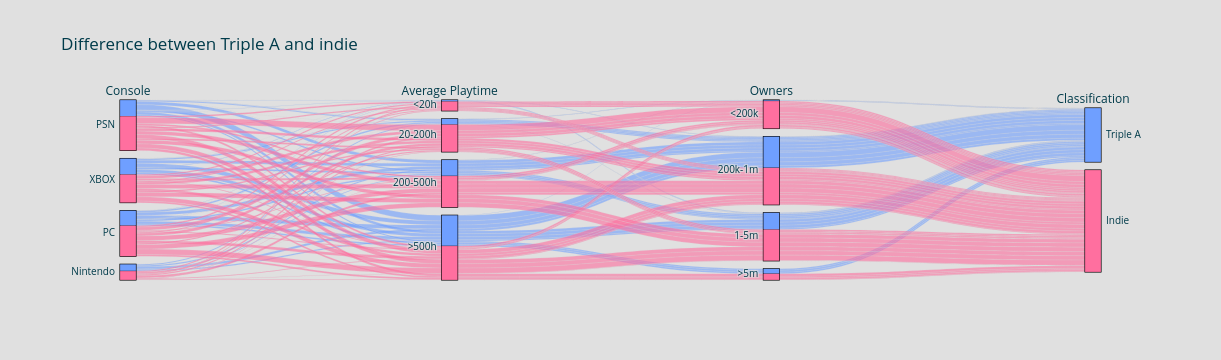

In [9]:
data = go.Parcats(
    dimensions=[
        
        {'label':'Console',
         'values':com_df['console_bins']},

        {'label':'Average Playtime',
         'values':com_df['playt_bins'],
         'categoryorder': 'array','categoryarray':['<20h','20-200h','200-500h','>500h']},
        
        # {'label':'Launch Price',
        #  'values':com_df['price_bins'],
        #  'categoryorder': 'array','categoryarray':['<10$','10-20$','20-50$','>50$']},

        {'label':'Owners',
         'values':com_df['owners_bins'],
         'categoryorder': 'array', 'categoryarray':['<200k','200k-1m','1-5m','>5m']},
        
        # {'label':'Positive ratings',
        #  'values':com_df['ratio_bins'],
        #  'categoryorder': 'array', 'categoryarray':['High','Average','Low']},
        
        # {'label':'Metascore',
        #  'values':com_df['meta_bins'],
        #  'categoryorder': 'array', 'categoryarray':['High','Average','Low']},


        {'label':'Classification',
         'values':com_df['AAA_bins']}
    ],
    sortpaths='backward',
    line={'color' : [AAA_colors[meta] for meta in com_df['is_aaa']], # comparing for Triple A
          'shape':'hspline'}, # 'hspline' is nicer but slower
)

layout = go.Layout(
    title = 'Difference between Triple A and indie',
    paper_bgcolor = '#E0E0E0',
    font={'color':'#003B4A'},
)

fig = go.Figure(data=data, layout=layout)

fig.show()

Although Indie games are generally better than there metascores suggest, the games of Triple A games will more likely have a active fanbase to play the game. As can been seen in the plot above. In the average playtime per game we see that a Triple A game is more likely to be played a lot than just a few hours. The same goes for the amount of people that buy the game. 

### `Indie games`

Indie games get their name from the independent studios that develop them: this means that they are not funded by a large video game publisher. Though the development teams are significantly smaller and the budget for their games are remarkably lower, indie studios are able to take more time to finish their games. Publishing companies will put strict deadlines on triple A games in order to appease company shareholders. However, a longer development time will require a higher budget. In the case of indie games, these budgets come from the developers' pockets, or are crowd funded.

### Launch price

When browsing the Steam store page, the most obvious difference between a triple A game and an indie one is its price. We wanted to see if there is an actual difference, or if this notion is the result of a perception bias.

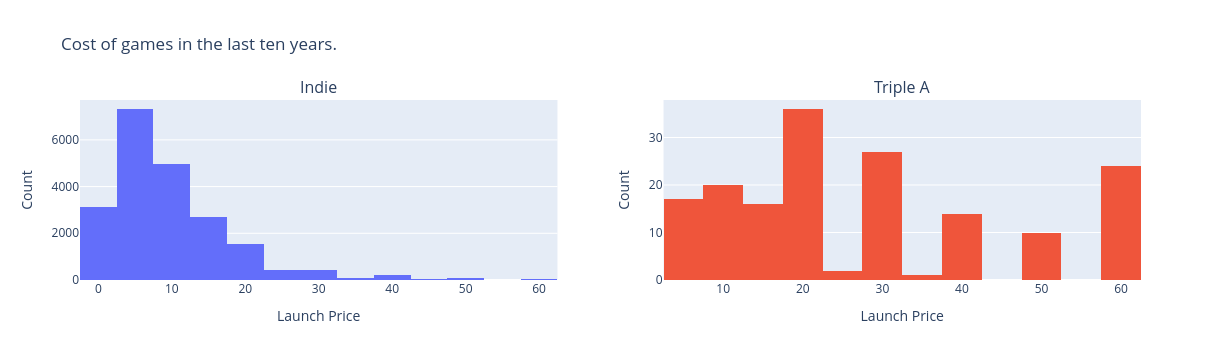

In [10]:
{
    "tags": [
        "hide_input",
    ]
}

df_rev['release_date'] = pd.to_datetime(df_rev['release_date'], format='%Y-%m-%d')
indie = df_rev[df_rev['is_aaa'] == 0]
indie = indie[indie['Launch Price'] <= 60]
indie = indie[indie['release_date'] >= '2014-01-01']
fig = make_subplots(rows=1, cols=2,
                   subplot_titles=('Indie', 'Triple A'))
fig.add_trace(
    go.Histogram(x=indie['Launch Price'], nbinsx = 12),
    row=1, col=1
)

aaa = df_rev[df_rev['is_aaa'] == 1]
aaa = aaa[aaa['Launch Price'] <= 60]
aaa = aaa[aaa['release_date'] >= '2014-01-01']
fig.add_trace(
    go.Histogram(x=aaa['Launch Price'], nbinsx = 12),
    row=1, col=2
)

fig.update_layout(
    title_text='Cost of games in the last ten years',
    xaxis_title='Launch Price',
    yaxis_title='Count',
    height=400,
    showlegend=  False
)
fig.update_xaxes(title_text="Launch Price", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.show()

The graph shows Indie games are generally cheaper than Triple A games. Indie developers want to keep their games inexpensive so people are more likely to give them a try, despite the fact that the developer is unkown to the player. \
The higher development and marketing costs for triple A games raise the price of their games significantly. These large studios are able to actually sell their games for a higher price, because they are a known brand that people trust.

### User scores

Furthermore, when we start looking at the user reviews of Triple A games and Indie games there is something to note.

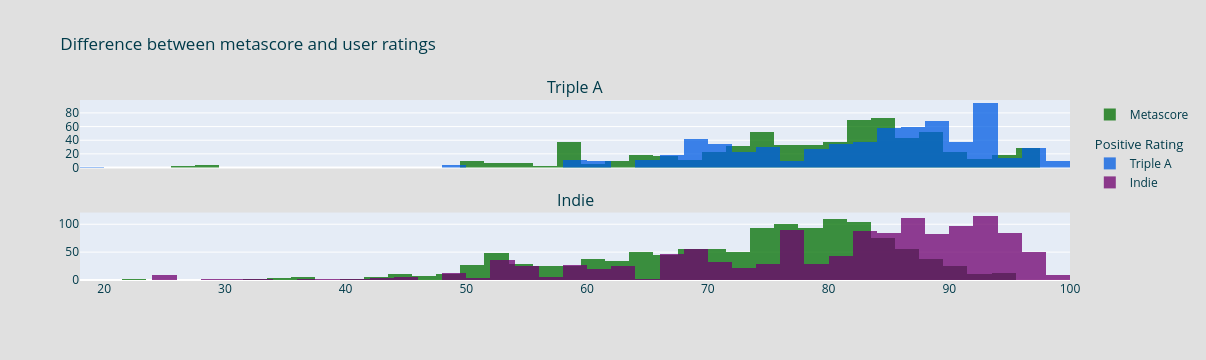

In [11]:

AAA_df = com_df[com_df['is_aaa'] == 1]
indi_df = com_df[com_df['is_aaa'] == 0]

fig = make_subplots(rows=2, cols=1,
                   subplot_titles=('Triple A', 'Indie'),
                   shared_xaxes=True,
)

fig.add_trace(
    go.Histogram(
        name='Metascore',
        x = AAA_df['metascore'],
        marker={'color':'#006F00'}, # green
        legendgroup='meta',
    ),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        name='Triple A',
        x = AAA_df['ratio_rating'],
        marker={'color':'#005DE3'}, # purple
        legendgroup='Positive rating',
        legendgrouptitle_text = 'Positive Rating',
    ),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        name='metascore 2',
        x = indi_df['metascore'],
        marker={'color':'#006F00'}, # green
        legendgroup='meta',
        showlegend = False,
    ),
    row=2, col=1
)
fig.add_trace(
    go.Histogram(
        name='Indie',
        x = indi_df['ratio_rating'],
        marker={'color':'#6F006F'}, # blue
        legendgroup='Positive rating',
        # showlegend=False,
    ),
    row=2, col=1
)

fig.update_layout(
    title = 'Analysis of metascores for different variables',
    paper_bgcolor = '#E0E0E0',
    font={'color':'#003B4A'},
    barmode='overlay',
    height = 600,
)

fig.update_layout(title='Difference between metascore and user ratings')
fig.update_traces(opacity=0.75)

fig.show()

As shown earlier we see that the metascore of Triple A games is somewhat higher than those of indie games. This could be explained by the higher budget that Triple A studios have, as this can make the game look and run better. However these overall improvements do not mean it is by definition a popular game. When we look at the positive/negative percentage of the games, we see that Indie games have around the same ratings as those of Triple A games. This shows us that the metascore does not measure accurately how enjoyable the game is.


### Playerbase growth

Finally, we were interested to see a game's player count over time. A growing playerbase means the game is appealing enough to atract new players and has enough substance to statisfy long-time players.

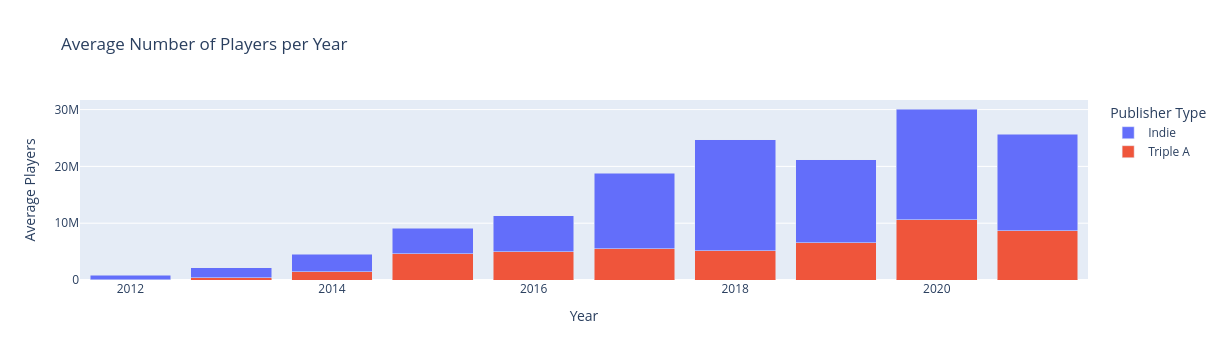

In [12]:
{
    "tags": [
        "hide_input",
    ]
}

data = pd.read_csv('DATASETS/Valve_Player_Data.csv')

# Example list of triple-A game names
triple_a_games = [
    'Counter Strike: Global Offensive', 'Dota 2', 'PlayerUnknown’s Battlegrounds', 
    'Grand Theft Auto V', 'Apex Legends', 'Destiny 2', 'Rainbow Six Siege', 'Warframe'
]

# Add a new column classifying the games as triple-A or indie
data['Publisher_Type'] = data['name'].apply(lambda x: 'Triple A' if x in triple_a_games else 'Indie')

# Extract the year from the Date column
data['Year'] = pd.to_datetime(data['Date']).dt.year

# Filter out the game 'Dota 2'
filtered_data = data[data['name'] != 'Dota 2']

# Group by year and publisher type
grouped_filtered_data = filtered_data.groupby(['Year', 'Publisher_Type'])['Avg_players'].sum().reset_index()

# Create a pivot table for better plotting
pivot_filtered_data = grouped_filtered_data.pivot(index='Year', columns='Publisher_Type', values='Avg_players').fillna(0)

# Plotting using Plotly
fig = go.Figure(data=[
    go.Bar(name='Triple A', x=pivot_filtered_data.index, y=pivot_filtered_data['Triple A'], marker_color='#EF553B'),
    go.Bar(name='Indie', x=pivot_filtered_data.index, y=pivot_filtered_data['Indie'], marker_color='#636EFA')
])

# Change the bar mode
fig.update_layout(barmode='stack', title='Average Number of Players per Year', 
                  xaxis_title='Year', yaxis_title='Average Players', legend_title='Publisher Type')

fig.show()

In this graph you can see a clear growth in the total average players over the years. While both types of games grow in amount of players, Indie games grow faster than Triple A games. Previously in this data story we argued that Triple A games have a higher player count. This is because Triple A targets a broader market, thus they start with a bigger playerbase. Indie games often have good quality gameplay, but they need to be discovered by the community. When they're discovered they often grow rapidly.

### `Summary`

Developing a triple A game is favorable, assuming it fits the developer's budget. A larger team, greater marketing presence, and a recognized name generally lead to higher estimated revenue, higher Metacritic scores, and increased player counts, but also result in higher development costs. \
\
However, such a large starting budget is unobtainable for smaller studios, or developers that are just starting out. These studios have to cut a lot of costs, usually in the graphics department: many indie games opt for a stylized look, instead of a triple A game's usual ultra-realistic graphics. Another frequent target of budget cuts is the marketing department: advertising is expensive, so smaller studios rely heavily on social media and word of mouth.
Budget cuts such as these allow indie studios to sell their games for a relatively low price. This is pretty much required for new or small studios for people to give their game a try, as they do not have a recognizable brand name to ensure some level of quality. \
Player count will increase gradually as people start to find out about the game. This contrasts with triple A games, where player counts typically peak on launch day. Afterwards the game will lose players as new games are published on the market. \
\
In conclusion, triple A games generally outperform Indie games on all fronts besides player retention. This is achieved through a larger development budget and brand awareness. Indie games can still be successful, but this takes more time compared to triple A games. Without a full fledged advertising strategy, these studios have to wait until their game reaches their audience through word of mouth.


### `Sources`

1. Ali, M. F. (2023). Most Played Games of All Time [Dataset]. In Kaggle. https://www.kaggle.com/datasets/faisaljanjua0555/most-played-games-of-all-time
2. Arora, K. (2023, November 23). The gaming industry: a behemoth with unprecedented global reach. Forbes. https://www.forbes.com/sites/forbesagencycouncil/2023/11/17/the-gaming-industry-a-behemoth-with-unprecedented-global-reach/#:~:text=In%202022%2C%20the%20global%20gaming%20industry%20generated%20an%20estimated%20%24184.4%20billion.&text=In%202022%2C%20the%20global%20recorded%20music%20industry%20generated%20%2426.2%20billion.&text=In%202022%2C%20the%20global%20movie,I%20find%20this%20mind%2Dblowing.
3. Carless, S. (2020, 3 augustus). How that game sold on Steam, using the “NB number”. The GameDiscoverCo newsletter. https://newsletter.gamediscover.co/p/how-that-game-sold-on-steam-using
4. Davis, N. (2019). Steam Store Games (Clean dataset) [Dataset]. In Kaggle. https://www.kaggle.com/datasets/nikdavis/steam-store-games
5. Barabanov, A. [evlko], & Kobelev, L. [Sadari]. (2023). Steam Trends 2023 by @evlko and @Sadari [Dataset]. In Google Docs. https://docs.google.com/spreadsheets/d/1D5MErWbFJ2Gsde9QxJ_HNMltKfF6fHCYdv4OQpXdnZ4/edit?gid=1714749788#gid=1714749788
6. Ogozaly, J. (2021). Steam Player Data [Dataset]. In Kaggle. https://www.kaggle.com/datasets/jackogozaly/steam-player-data
7. Paredes, L. (2018). Metacritic games [Dataset]. In Kaggle. https://www.kaggle.com/datasets/destring/metacritic-reviewed-games-since-2000
8. Smith, G. (2016). Video game sales [Dataset]. In Kaggle. https://www.kaggle.com/datasets/gregorut/videogamesales

### `Reflection`

#### Peer feedback
One and a half weeks before the end of the project, we held a peer feedback session. During this session, we received valuable feedback from two groups and the TA of our project. We used their comments to improve our data story.

Before the peer feedback session, we had created four graphs independently, aiming to make each as complete as possible. Each graph included a general title, titles for the x-axis and y-axis, a legend, and a short explanation. In general, the feedback indicated that the basis of the data story was solid.

The most common point of improvement was to focus on the primary argument we wanted to convey through our graphs. An essential aspect of data visualization is to ensure that viewers are quickly aware of the main point of the visualization. Some of our graphs were too complex or had too many categories, making it difficult to identify the key message. We made several adjustments to our visualizations to improve this. For some graphs, we made simpler visualizations. For others, we removed unnecessary subcategories or variables to better highlight the main argument.

In addition to the feedback, an important note was to transform our individual visualizations into a cohesive story. Initially, we had created several graphs independently. During the peer feedback session, these graphs were presented, without smooth transitions between them. To create a better data story, it was necessary to improve the structure. We reorganized our graphs in a way that made it easier for viewers to follow and understand the data story. \

### Work distribution
`Yorben` \
Managing Git, Jupyterbook website build, text rephrasing/spell-checking, two graphs: \
'Analysis of price and metascore' and 'Average Number of Players per Year' \
`Mick` \
Two graphs: \
'Difference between Triple A and indie' and 'Difference between metascore and user ratings' \
`Alwin` \
'Average number of players, based on the type of game and price category' graph \
`Max` \
Writing, text rephrasing/spell-checking, two graphs: \
'Mean estimated revenue for AAA and indie games, based on Steam ratings' and 'Cost of games in the last ten years'
